In [71]:
import numpy as np
import scipy as sp
import sklearn as skl
import pandas as pd
import pandas_profiling

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [72]:
#!ls input
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")

In [73]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

for i in tqdm(range(df_train.shape[1])):
    if df_train.iloc[:, i].dtypes == object:
        labeler = LabelEncoder()
        labeler.fit(list(df_train.iloc[:,i].values) + list(df_test.iloc[:,i].values))
        df_train.iloc[:,i] = labeler.transform(list(df_train.iloc[:,i].values))
        df_test.iloc[:,i] = labeler.transform(list(df_test.iloc[:,i].values))

100%|██████████| 81/81 [00:00<00:00, 471.02it/s]


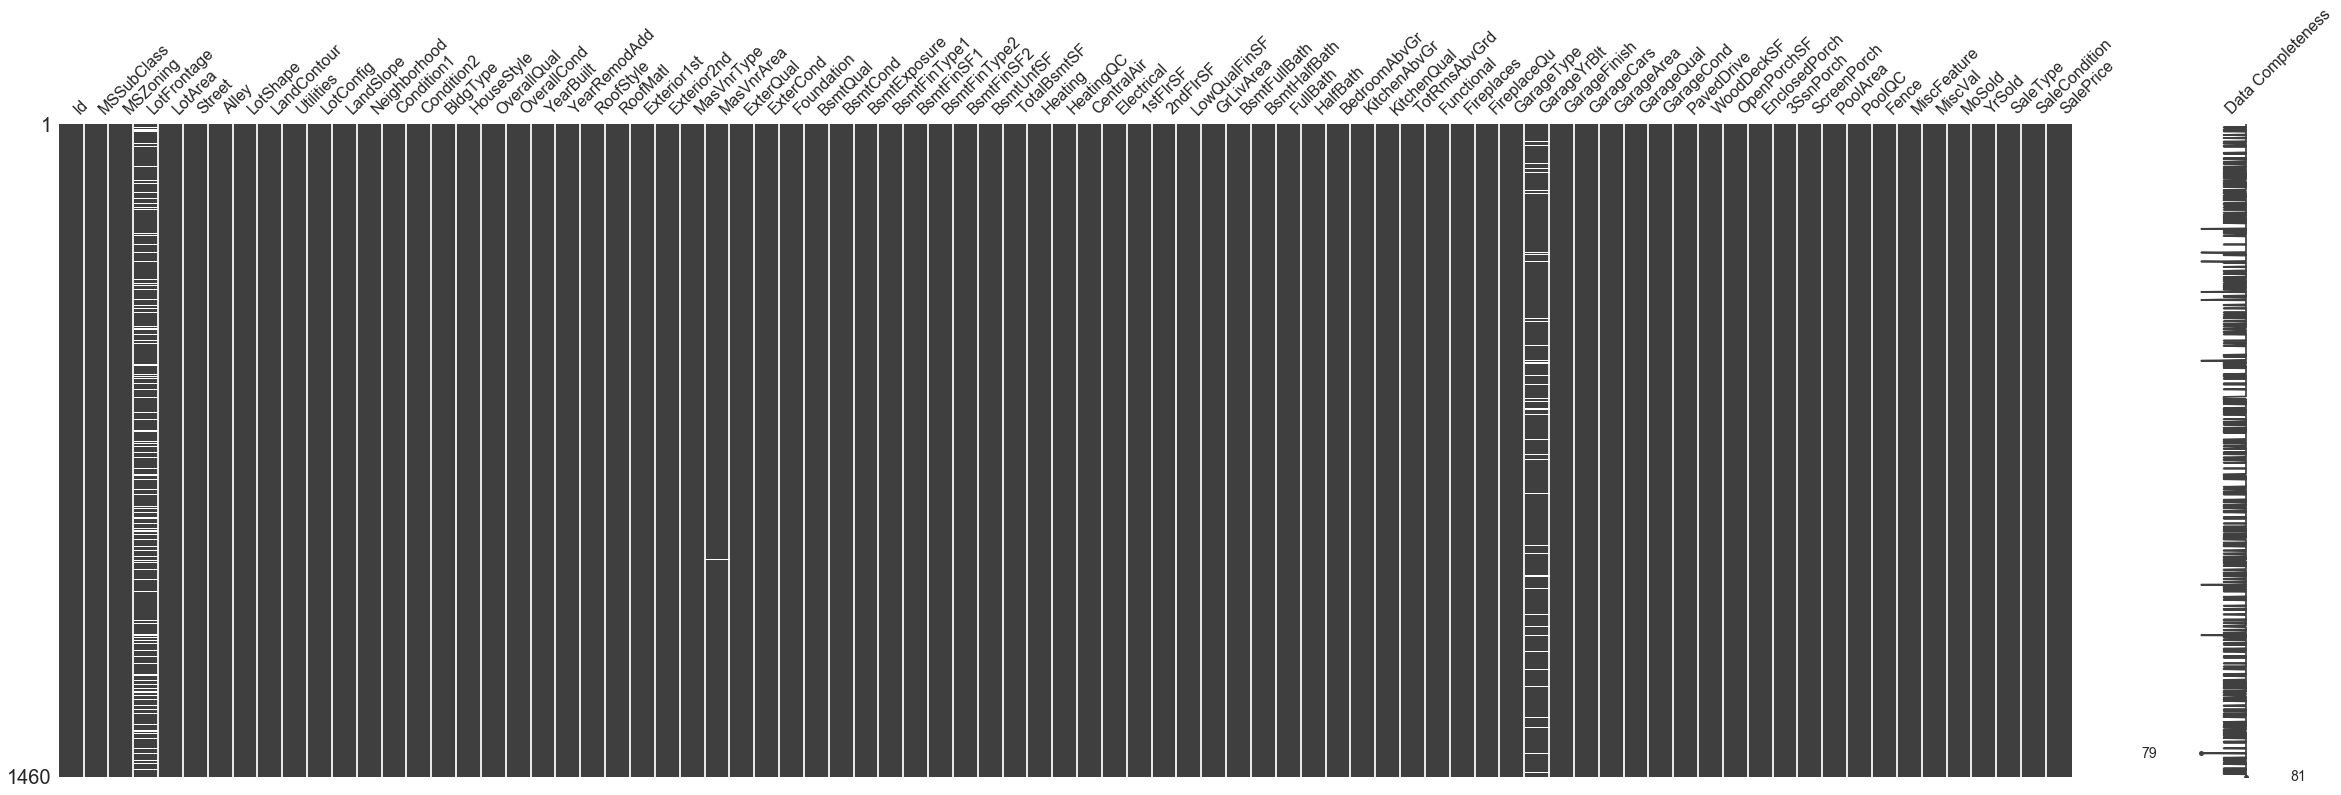

In [74]:
import missingno as msno
%matplotlib inline
msno.matrix(df_train, labels=True, figsize=(40,12))

In [75]:
pandas_profiling.ProfileReport(df_train)

Number of variables,81
Number of observations,1460
Total Missing (%),0.3%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,78
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [76]:
train_ID = df_train["Id"]
test_ID = df_test["Id"]

In [79]:
y_train = df_train["SalePrice"]
X_train = df_train.drop(["Id", "SalePrice"], axis=1)

X_test = df_test.drop(["Id"], axis=1)

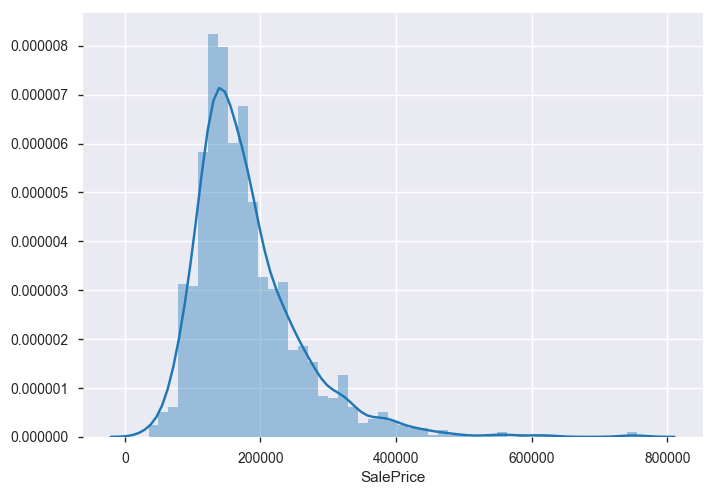

In [80]:
ax = sns.distplot(y_train)
plt.show()

In [81]:
y_train_log = np.log(y_train)

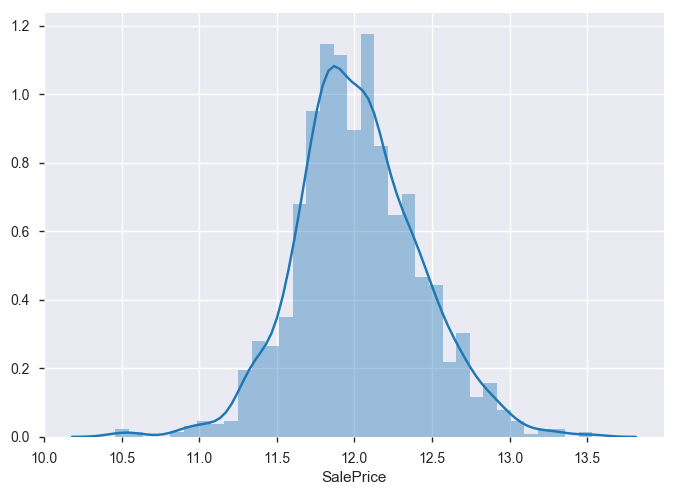

In [82]:
sns.distplot(y_train_log)

In [83]:
X_train = X_train.drop(["LotFrontage", "MasVnrArea", "GarageYrBlt"], axis=1)
X_train = X_train.fillna(X_train.median())

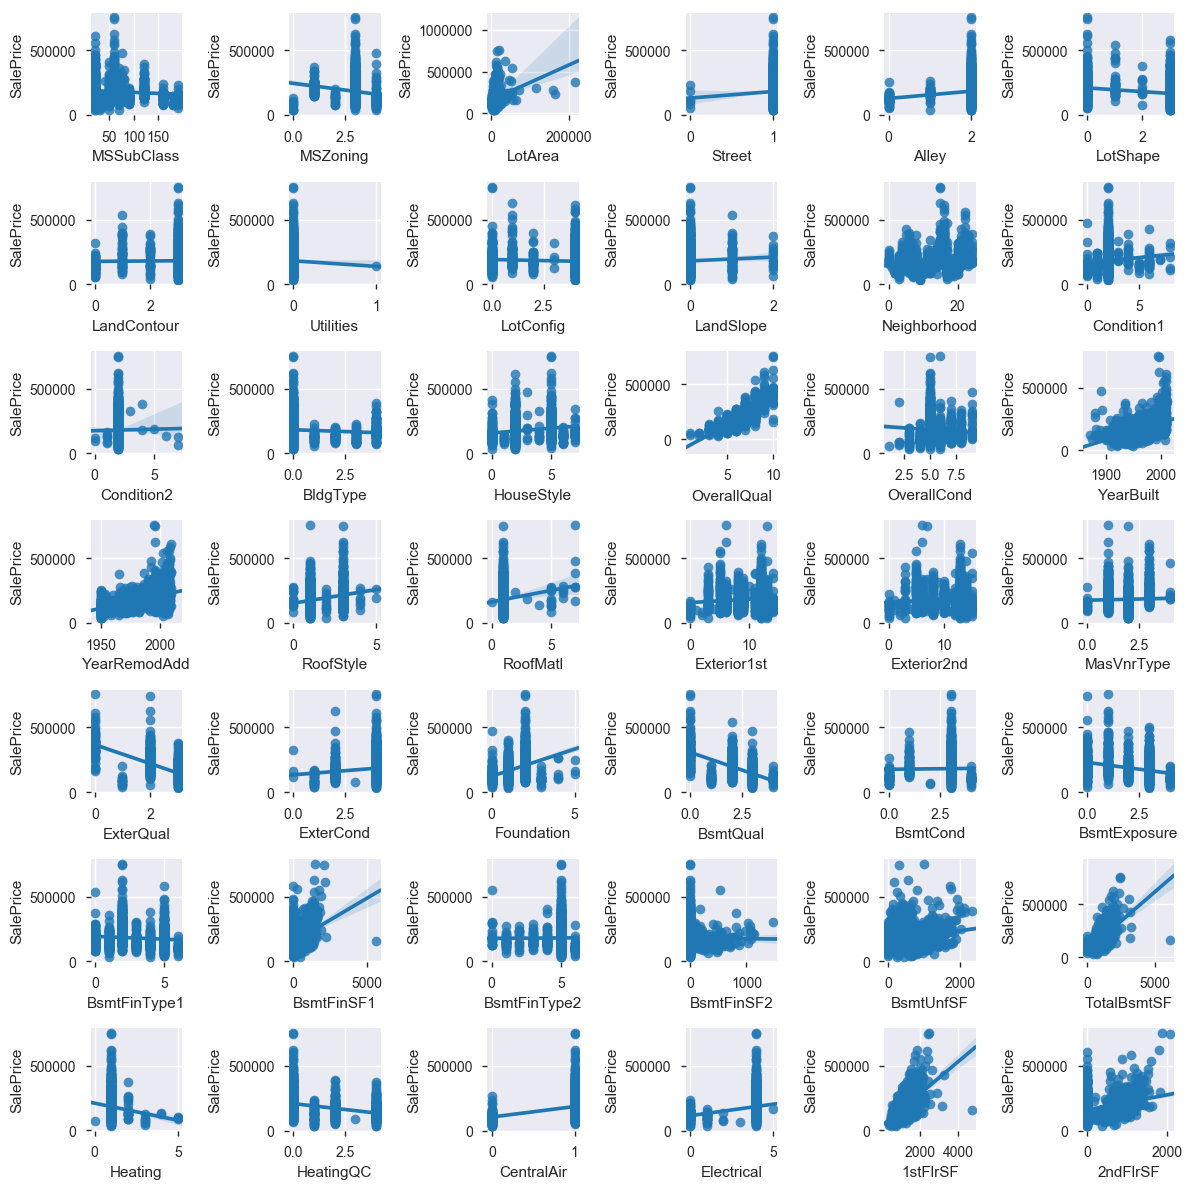

In [84]:
fig = plt.figure(figsize=(12,12))
for i in np.arange(42):
    ax = fig.add_subplot(7,6,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

In [98]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(x_train, y_train_log)

X_test = X_test.fillna(X_test.median())

y_test = np.exp(xgb_reg.predict(X_test))

In [100]:
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_test
})
submission.to_csv("houseprice.csv", index=False)